# HW08 (제출기한-5월22일 금요일 15시)
Datascience 모듈 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.
- <font color=red> 반드시 출력셀의 결과가 예시와 동일하게 출력되도록 코드를 작성하시오. (불필요한 출력을 하는 코드를 작성하지 마시오) </font>

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤,
- 코드 셀에 적절한 코드를 작성하기 바랍니다.
- 작성 후 파일명에 ``학번``을 명시후 지정한 공유폴더에 업로드합니다.
- 이때, 공유를 반드시 profkwon@cicweb.ulsan.ac.kr 에게만 합니다.


In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [70]:
scores = Table.read_table('scores_by_section.csv')
scores

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


### 문제1
Section별 median을 구하여 ``section_median`` Table 변수에  저장하시오.

In [0]:
section_median = scores.group('Section',np.median)

In [72]:
section_median

Section,Midterm median
1,15
2,16.5
3,15
4,14
5,18
6,16
7,17
8,17
9,16
10,16


### 문제2
4번 Section의 학생수를 ``no_student``변수에 저장하시오. 

In [0]:
no_student = scores.where('Section', are.equal_to(4)).num_rows

In [74]:
print(no_student)

30


### 문제3
전체 학생중 4번 Section 학생 수 만큼 랜덤하게 sampling 후 median을 계산하는 시행을 10000번 반복하고 그 결과를 array에 저장하여 그 array를 리턴하는 함수 ``sample_median``를 작성하시오. 

(단, ``replacement``는 False로 설정한다.)

In [0]:
def sample_median():
  medians=make_array()
  
  for i in np.arange(10000):
    new_median = scores.sample(no_student, with_replacement=False).drop('Section')
    medians = np.append(medians, np.median(new_median.column('Midterm')))
    
  return medians

In [76]:
results = sample_median()
results

array([17. , 16.5, 17.5, ..., 15.5, 16. , 14.5])

### 문제4
위 ``results`` 배열에 대해 historgram을 그려보시오. 

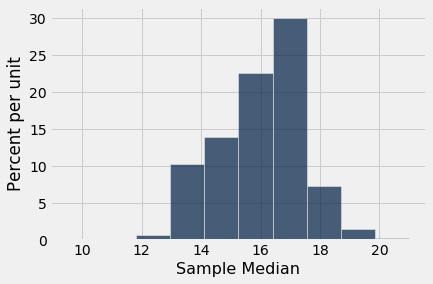

In [77]:
results_hist = Table().with_column('Sample Median', results)
results_hist.hist()

### 문제5
위에서 구한 ``results``에 대하여 관측값(4번 Section의 median)의 ``p-value``를 계산하시오. 

In [78]:
np.count_nonzero(results <= scores.group('Section',np.median).where('Section',are.equal_to(4)).column('Midterm median'))/10000

0.1289

### 문제6
``scores`` Table에서 Section이 4 또는 5인 경우만을 선택하여 ``scores_two`` Table 변수에 저장하시오.  

In [0]:
scores_two = scores.where('Section',are.between_or_equal_to(4, 5))

In [80]:
scores_two

Section,Midterm
4,19
5,8
5,24
5,24
5,16
5,21
5,24
4,14
5,23
4,24


### 문제7
5번 Section의 median에서 4번 Section의 median을 뺀 값을 ``observed``변수에 저장하시오. 

In [0]:
observed = scores.group('Section',np.median).where('Section',are.equal_to(5)).column('Midterm median').take(0) - scores.group('Section',np.median).where('Section',are.equal_to(4)).column('Midterm median').take(0)

In [82]:
observed

4.0

### 문제8
위 ``scores_two`` Table에 대하여 shuffling 한 후 두 그룹 (5번과 4번 Section) 사이의 median 차이를 구하는 시행을 10000번 반복하고 그 결과를 array에 저장하여 그 array를 리턴하는 함수 ``shuffle_median``를 작성하시오. 


In [0]:
def shuffle_median():
  differences = make_array()
  
  for i in np.arange(10000):
    shuffled = scores_two.sample(with_replacement=False).column(1)
    original_and_shuffled = scores_two.with_column('Shuffled Data', shuffled)
    
    shuffled_medians = original_and_shuffled.group('Section', np.median).column(2)
    simulated_difference = shuffled_medians.item(1) - shuffled_medians.item(0)
  
    differences = np.append(differences, simulated_difference)
    
  return differences   

In [84]:
shuffle_results = shuffle_median()
shuffle_results

array([ 0. ,  2. , -0.5, ...,  4. ,  1. , -4.5])

### 문제9
위 ``shuffled_results`` 배열에 대해 historgram을 그려보시오. 

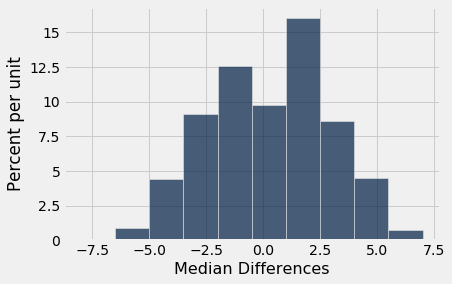

In [85]:
shuffle_results_hist = Table().with_column('Median Differences', shuffle_results)
shuffle_results_hist.hist()

### 문제10
위에서 구한 ``shuffle_results``에 대하여 관측값(``observed``변수값)의 ``p-value``를 계산하시오. 

In [86]:
np.count_nonzero(shuffle_results >= observed)/10000

0.0783

### 보너스문제
위 데이터에 대하여 본인이 출제하고 싶은 문제가 있으면 한 문제를 출제하고 아래에 답안 코드를 작성하시오.

위 데이터들 중 Simulated statistics by shuffling을 적용한 데이터를 hist로 Observed statistic을 적용한 데이터를  hist위의 scatter plots으로 표시하여 비교할 수 있도록 그려보시오. (단, 데이터들 중 위를 적용한 데이터가 여러 개라면 matplotlib를 사용하여 그려보시오.)


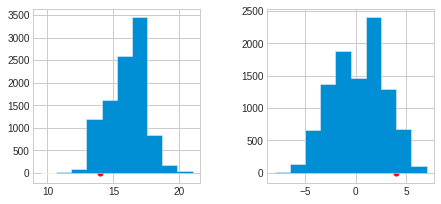

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(6.4, 3.2))
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.4)

a_hist = fig.add_subplot(grid[:1,:1])
b_hist = fig.add_subplot(grid[:1,1:2])

a_hist.hist(results,10, histtype='stepfilled',orientation='vertical')
a_hist.scatter(scores.group('Section',np.median).where('Section',are.equal_to(4)).column('Midterm median'), 0, color='red', s=30)

b_hist.hist(shuffle_results,10, histtype='stepfilled',orientation='vertical')
b_hist.scatter(observed, 0, color='red', s=30)